### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.mlab as mlab
from scipy.stats import ttest_1samp
import seaborn as sns

**Read CSV file**

In [3]:
df = pd.read_csv('Assignment_heart_failure_clinical_records.csv')

### Sample: randomly select 20 records
Use Python libraries like random to select two random samples of 20 records each (Sample 1 & Sample 2).

In [107]:
sample = df.sample(20, random_state = 1)

In [108]:
sample

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
173,50,1,115,0,20,0,189000.00,0.80,139,1,0,146,0
287,45,0,582,1,55,0,543000.00,1.00,132,0,0,250,0
51,53,1,91,0,20,1,418000.00,1.40,139,0,0,43,1
146,52,0,132,0,30,0,218000.00,0.70,136,1,1,112,0
214,65,1,135,0,35,1,290000.00,0.80,134,1,0,194,0
197,65,0,167,0,30,0,259000.00,0.80,138,0,0,186,0
274,60,1,257,1,30,0,150000.00,1.00,137,1,1,245,0
62,55,0,109,0,35,0,254000.00,1.10,139,1,1,60,0
27,70,0,122,1,45,1,284000.00,1.30,136,1,1,26,1
201,45,0,308,1,60,1,377000.00,1.00,136,1,0,186,0


## EDA

### Explore the Data in Each Sample:
a. check for missing values

b. calculate measures like mean, median, mode etc for the variables

c. summary statistics

**Check for null values**

In [109]:
sample.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

There are no missing values.

### Summary/Descriptive Statistics

- To understand the central tendency, spread, and potential skewness of the data

In [110]:
sample.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,59.200000,0.35000,422.850000,0.400000,36.700000,0.300000,297417.901500,1.161500,136.700000,0.700000,0.450000,135.250000,0.300000
std,12.107414,0.48936,512.853449,0.502625,11.907981,0.470162,118702.700123,0.349982,2.473012,0.470162,0.510418,81.400165,0.470162
min,45.000000,0.00000,91.000000,0.000000,20.000000,0.000000,149000.000000,0.700000,132.000000,0.000000,0.000000,10.000000,0.000000
25%,50.000000,0.00000,131.250000,0.000000,30.000000,0.000000,245500.000000,0.900000,135.500000,0.000000,0.000000,84.000000,0.000000
50%,55.000000,0.00000,244.000000,0.000000,35.000000,0.000000,263679.015000,1.050000,137.000000,1.000000,0.000000,103.500000,0.000000
75%,65.000000,1.00000,422.250000,1.000000,39.750000,1.000000,320000.000000,1.325000,139.000000,1.000000,1.000000,198.750000,1.000000
max,86.000000,1.00000,1876.000000,1.000000,60.000000,1.000000,621000.000000,1.830000,140.000000,1.000000,1.000000,271.000000,1.000000


Important notes: 
- std for Platelets, Creatinine is very high. Widely spread data. 
- age, time, platelets is slightly right skewed
- creatinine_phosphokinase is skewed to the right

### Visualization

Used color to differentiate patients based on the death event (DEATH_EVENT) variable.

Orange: to represent patients with a death event (DEATH_EVENT = 1).

Blue: to represent patients without a death event (DEATH_EVENT = 0).

**Histogram distribution for different variables related Heart Failure**

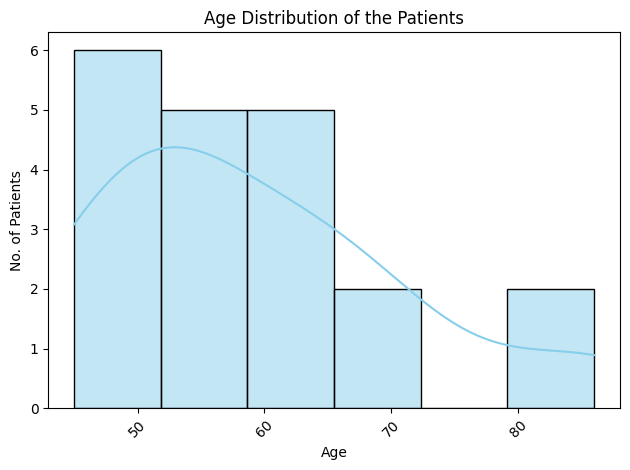

In [111]:
# Create a histogram

sns.histplot(data=sample, x="age", kde=True, color = 'skyblue')  

# Adjust 'kde' for density estimation. 
#kde is smoothed density curve on top of the histogram bars 

plt.title("Age Distribution of the Patients")
plt.xlabel("Age")
plt.ylabel("No. of Patients")
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

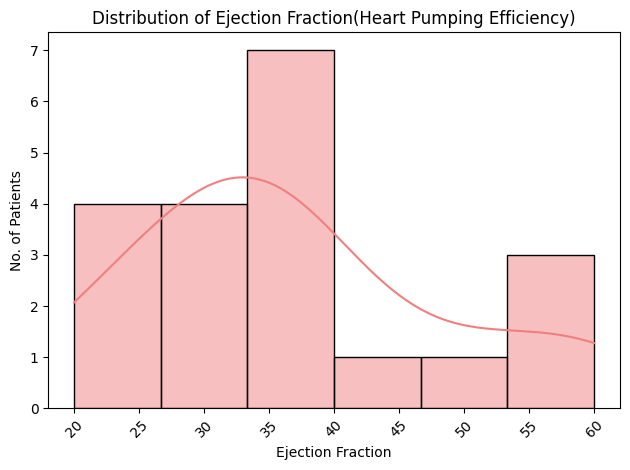

In [130]:

# Create a histogram

sns.histplot(data=sample, x="ejection_fraction", kde=True, color = 'lightcoral')  

# Adjust 'kde' for density estimation. 
#kde is smoothed density curve on top of the histogram bars 

plt.title("Distribution of Ejection Fraction(Heart Pumping Efficiency)")
plt.xlabel("Ejection Fraction")
plt.ylabel("No. of Patients")
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for readability
plt.tight_layout()

plt.show()

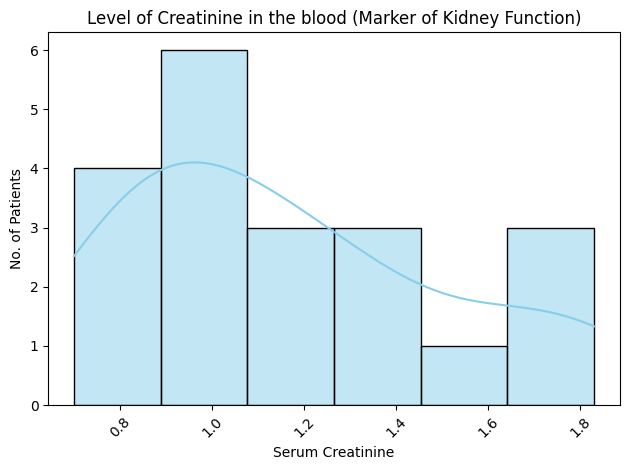

In [150]:
# Create a histogram

sns.histplot(data=sample, x="serum_creatinine", kde=True, color = 'skyblue')  

# Adjust 'kde' for density estimation. 
#kde is smoothed density curve on top of the histogram bars 

plt.title("Level of Creatinine in the blood (Marker of Kidney Function)")
plt.xlabel("Serum Creatinine")
plt.ylabel("No. of Patients")
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

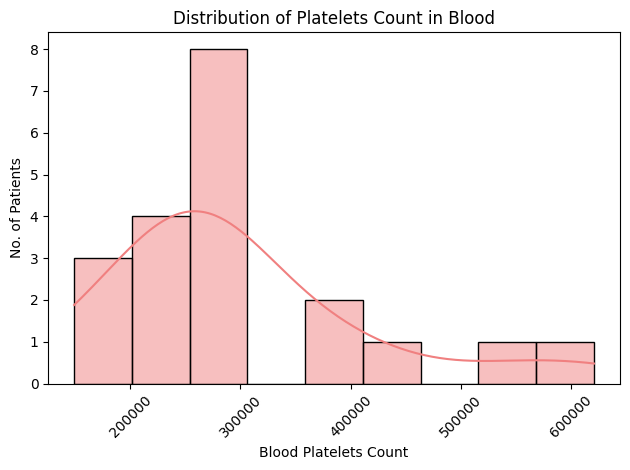

In [114]:
# Create a histogram

sns.histplot(
    data=sample, 
    x="platelets", 
    kde=True, 
    color = 'lightcoral'
)  

# Adjust 'kde' for density estimation. 
#kde is smoothed density curve on top of the histogram bars 

plt.title("Distribution of Platelets Count in Blood")
plt.xlabel("Blood Platelets Count")
plt.ylabel("No. of Patients")
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

**Pie charts for different variables related Heart Failure**

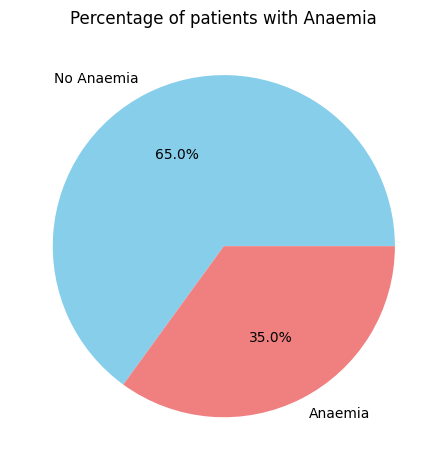

In [115]:
data = sample.anaemia.value_counts().to_numpy()
labels = ['No Anaemia','Anaemia']
plt.pie(data, labels = labels, autopct = '%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title("Percentage of patients with Anaemia")
# Adjust layout (optional)
plt.tight_layout()
plt.show()

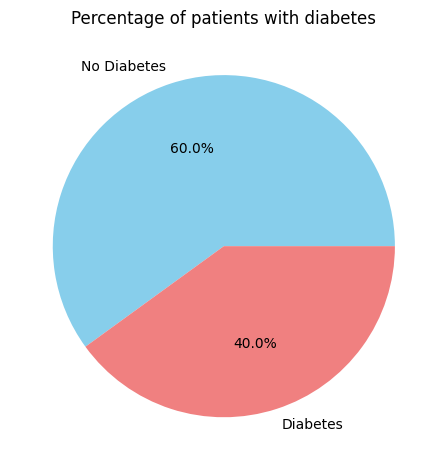

In [116]:
data = sample.diabetes.value_counts().to_numpy()
labels = ['No Diabetes','Diabetes']

#Create Pie chart
plt.pie(data, labels = labels,autopct = '%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Percentage of patients with diabetes')

# Adjust layout (optional)
plt.tight_layout()
#Display
plt.show()

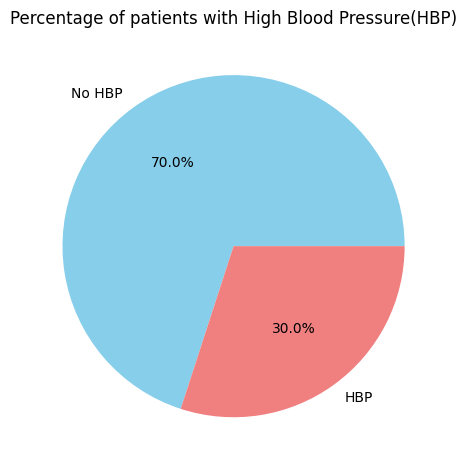

In [117]:
data = sample.high_blood_pressure.value_counts().to_numpy()
plt.pie(data, labels = ['No HBP','HBP'],autopct = '%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Percentage of patients with High Blood Pressure(HBP)')

# Adjust layout (optional)
plt.tight_layout()

plt.show()

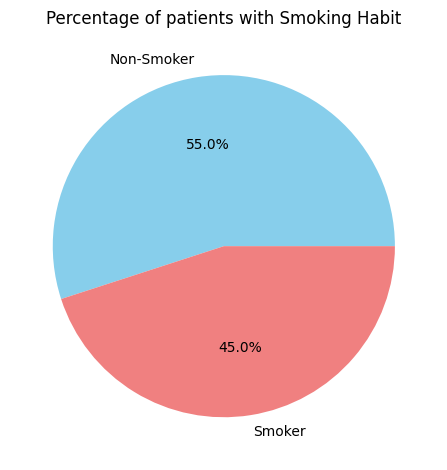

In [118]:
data = sample.smoking.value_counts().to_numpy()
plt.pie(data, labels = ['Non-Smoker','Smoker'],autopct = '%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Percentage of patients with Smoking Habit')
# Adjust layout (optional)
plt.tight_layout()
plt.show()

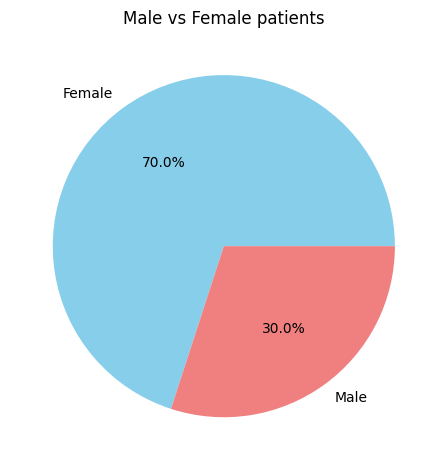

In [119]:
data = sample.sex.value_counts().to_numpy()
plt.pie(data, labels = ['Female','Male'],autopct = '%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Male vs Female patients')
# Adjust layout (optional)
plt.tight_layout()
plt.show()

### Bivariate Analysis:

**Scatter Plot for Serum_creatinine vs Age indicating Death Event**

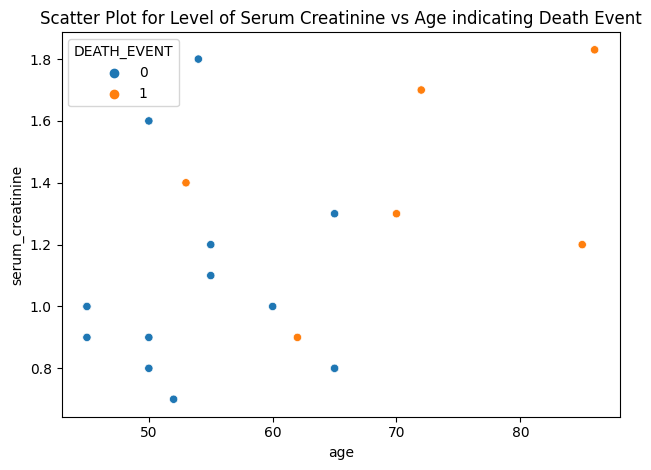

In [135]:
#Using scatter plot

sns.scatterplot(
    
    x = 'age', #independent variable
    y = 'serum_creatinine', #dependent variable
    hue = "DEATH_EVENT",
    data = sample,
)
plt.title('Scatter Plot for Level of Serum Creatinine vs Age indicating Death Event')
plt.tight_layout()

**Interpretation:** 

Lower serum creatinine levels, mostly below 1.4 serum level. Additionally, the graph suggests that individuals with no Death Event are younger and have generally lower serum creatinine levels, which is typically associated with better kidney function.

On the other hand, the red points are scattered at older ages with higher serum creatinine levels indicating compromised kidney functions for older people.

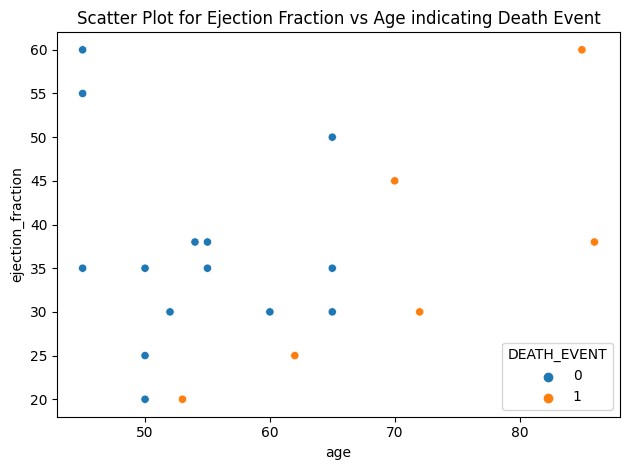

In [134]:
#Using scatter plot

sns.scatterplot(
    
    x = 'age', #independent variable
    y = 'ejection_fraction', #dependent variable
    hue = "DEATH_EVENT",
    data = sample
)
plt.title('Scatter Plot for Ejection Fraction vs Age indicating Death Event')
plt.tight_layout()

**Interpretation**
- There might be a positive correlation between ejection fraction and no death event. In other words, patients with higher ejection fractions (better heart function) seem to be more likely to survive in the records.
- Lower ejection fractions could be a potential risk factor for death events in heart failure patients. However, there are some red points (death event) have higher ejection fractions, suggesting other factors might also be at play.
- Age doesn't seem to have a strong visual relationship with the death event outcome in this scatter plot. There are patients who experienced death events (red) across the entire age range.

### Discussion

### Conclusion